In [1]:
# Dubbi:
#1 come mai le chiavi di a sembrano random?
#2 come faccio a non fare re-inserimento ?? Ricorda io estraggo d-1 cosi, più uno, più un altro che è quello di arrivo

In [11]:
import OffsetArrays
using Plots
using Revise
using ProgressMeter
using SparseArrays, LinearAlgebra, IndexedGraphs, Graphs
include("./src/functions.jl")

pop_dynamics (generic function with 1 method)

In [12]:
# S=0   I=1
# The times go from ti = 0 to ti=T+1
# when ti=0 it means that i is the zero patient
# when ti=T+1 it means that i is never infected

λp = 0.6 # planted infection rate
λi = 0.6 # inferred infection rate

d = 3 # degree (fixed for now) 
T = 4 # discrete time

γp = 0.1 # planted autoinfection probability
γi = 0.1 # inferred autoinfection probability

N = 5000; #population size

In [20]:
marg2D = pop_dynamics(N,T,λp,λi,γp,γi,d, tot_iterations = 40000)

Progress: 100%|█████████████████████████████████████████| Time: 0:02:13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


6×6 Matrix{Float64}:
 0.0160598  0.0219338  0.0262721  0.0222251  0.012844   0.0
 0.0242199  0.0337252  0.0416994  0.0364494  0.0215442  0.0
 0.0272745  0.0394573  0.0531707  0.0518717  0.0331712  0.0
 0.0233945  0.03465    0.052024   0.0635554  0.0504299  0.0
 0.0114126  0.0175672  0.0293702  0.0444245  0.075744   0.0
 0.0        0.0        0.0        0.0        0.0        0.135509

# Population dynamics for the messages

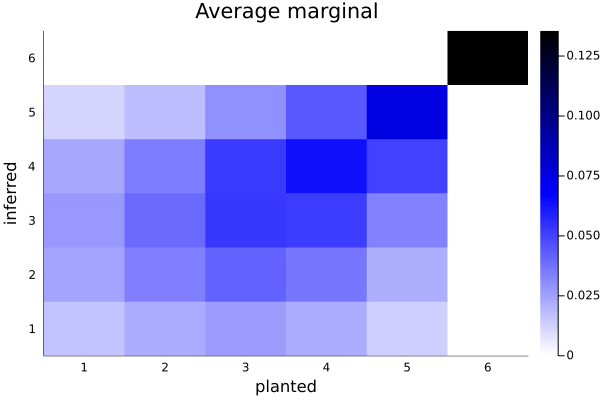

In [21]:
marg2D = pop_dynamics(N,T,λp,λi,γp,γi,d, tot_iterations = 40000)
plot_heat = heatmap((marg2D),c=[:white,:blue,:black],xlabel="planted",ylabel="inferred",title="Average marginal")

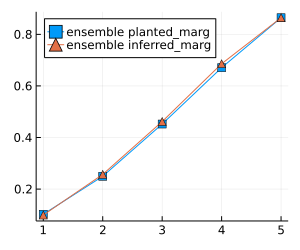

In [22]:
p0 = plot(cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1),marker=:square,label="ensemble planted_marg")
p0 = plot!(cumsum(sum(marg2D,dims=2)[1:end-1],dims=1),marker=:utriangle,label="ensemble inferred_marg",legend=:bottomright)
plot(p0,size=(300,250),legend=:topleft)